#####  Wind speed time 
- Open multiple files as a single dataset
- visualizations for each grid as a line over time
- and mean wind speed across all grid points
  
Ming Ge April 2025

In [1]:
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#### read data from MPAS grid as xarray

In [2]:
ds = xr.open_mfdataset(
    "/glade/derecho/scratch/duda/mpas_tutorial/240-48km_variable/diag.2014-09-1*.nc"
)

In [3]:
# Extract the wind variables
uu = ds["uzonal_surface"]  
vv = ds["umeridional_surface"]

# Wind speed
wind_speed = np.sqrt(uu**2 + vv**2)

# Wind direction (from which the wind is blowing, in degrees)
#wind_direction = (270 - np.degrees(np.arctan2(vv, uu))) % 360

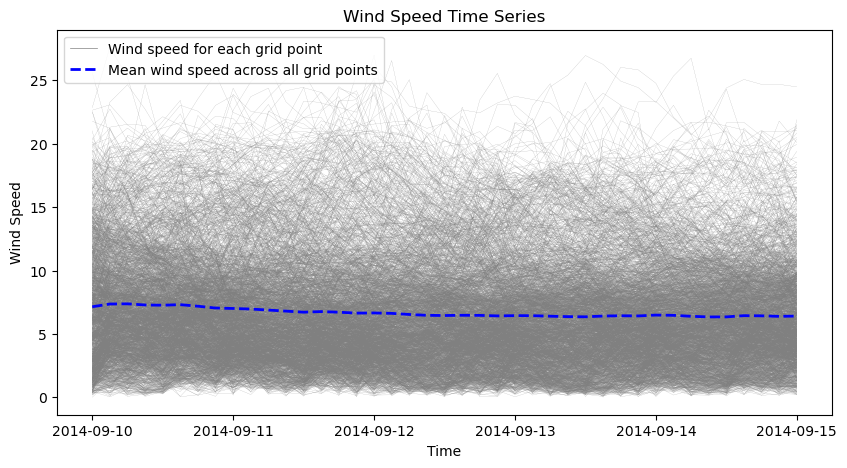

In [5]:
# to speed up, I use first 1000 points
npt = 2000

# Calculate and plot the mean wind speed across all grid points for each time step
wind_speed_mean = wind_speed[:npt].mean(axis=(1))

# Create a figure and axis object for time series plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot wind speed for each grid point as a line
#for j in range(wind_speed.shape[1]):
for j in range(npt):
    ax.plot(ds.Time.values, wind_speed[:, j], color='Grey', linewidth=0.1)

lines = ax.plot(ds.Time.values, wind_speed_mean.values, linestyle='--', color='blue', linewidth=2)

# Set x-axis label
ax.set_xlabel('Time')

# Set y-axis label
ax.set_ylabel('Wind Speed')

# Add a title
plt.title('Wind Speed Time Series')

# Add legend
legend_elements = [Line2D([0], [0], color='gray', lw=0.5, label='Wind speed for each grid point'),
                   Line2D([0], [0], linestyle='--', color='blue', lw=2, label='Mean wind speed across all grid points')]

ax.legend(handles=legend_elements, loc='upper left');